# Statistical Machine Learning Exercise Sheet 5
- Laura Haege
- Philipp Noel von Bachmann, Matrikelnummer: 4116220

## Exercise 9

### (a)

The primal problem is given as:
$ min_{w \in \mathbb(R)^d, \epsilon \in \mathbb(R)^n} \frac{1}{2}\Vert w \Vert^2 + \frac{C}{n} \sum_i \epsilon_i$, subject to: $Y_i (\langle w, X_i \rangle ) \geq 1-\epsilon , \epsilon_i \geq 0$.


The lagrangian of the problem is : $\frac{1}{2}\Vert w \Vert^2 + \frac{C}{n} \sum_i \epsilon_i + \sum_i \alpha_i (1 - \epsilon_i - Y_i \langle w, X_i \rangle ) - \sum_i \beta_i \epsilon_i$

Now take the derivative:
\begin{align}
& \nabla_w \frac{1}{2}\Vert w \Vert^2 + \frac{C}{n} \sum_i \epsilon_i + \sum_i \alpha_i (1 - \epsilon_i - Y_i \langle w, X_i \rangle ) - \sum_i \beta_i \epsilon_i \\
&= w - \sum_i \alpha_i Y_i X_i\\
& \Rightarrow w=\sum_i \alpha_i Y_i X_i
\end{align}

\begin{align}
& \frac{\partial}{\partial \epsilon_i} \frac{1}{2}\Vert w \Vert^2 + \frac{C}{n} \sum_i \epsilon_i + \sum_i \alpha_i (1 - \epsilon_i - Y_i \langle w, X_i \rangle ) - \sum_i \beta_i \epsilon_i\\
& = \frac{C}{n} - \alpha_i - \beta_i \\
\end{align}

By setting the gradient of $\epsilon$ to 0 we can use this equation to get rid of beta, as $\beta_i = \frac{C}{n} - \alpha_i$, this imposed the constrain $\alpha_i < \frac{C}{n} $ due to the positivity of $\beta$.

No substitution in $L$ we get:
\begin{align}
& \frac{1}{2} \Vert \sum_i \alpha_i Y_i X_i \Vert^2 + \frac{C}{n} \sum_i \epsilon_i \sum_i \alpha_i (1 - \epsilon_i - Y_i \langle \sum_i \alpha_i Y_i X_i, X_i \rangle ) - \sum_i (\frac{C}{n} - \alpha_i) \epsilon_i\\
& \frac{1}{2} \Vert \sum_i \alpha_i Y_i X_i \Vert^2 + \sum_i (\frac{C}{n} - \alpha_i) \epsilon_i \sum_i \alpha_i (1 - Y_i \langle \sum_i \alpha_i Y_i X_i, X_i \rangle ) - \sum_i (\frac{C}{n} - \alpha_i) \epsilon_i\\
&= \frac{1}{2} \Vert \sum_i \alpha_i Y_i X_i \Vert^2 + \sum_i \alpha_i  - \sum_i \alpha_i Y_i \langle \sum_i \alpha_i Y_i X_i, X_i \rangle)\\
&=  \sum_i \alpha_i  - \frac{1}{2} \Vert \sum_i \alpha_i Y_i X_i \Vert^2\\
&=  \sum_i \alpha_i  - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j \langle x_i, x_j \rangle\\
\end{align}

Or dual problem is therefore given as:
$\max_{\alpha \in \mathbb{R}^n} \sum_i \alpha_i  - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j \langle x_i, x_j \rangle$, subject to $0\leq \alpha_i \leq \frac{C}{n}$.


### (b)

1.
The derivative is given by:
\begin{align}
\frac{\partial}{\partial \alpha_r} \Psi(..., \alpha_r, ...)
&= \frac{\partial}{\partial \alpha_r} \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j Y_i Y_j \langle x_i, x_j \rangle \\
&=  1 - \frac{\partial}{\partial \alpha_r} \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j Y_i Y_j \langle x_i, x_j \rangle \\
&=  1 - \alpha_r Y_r^2 \langle x_r, x_r \rangle - \frac{\partial}{\partial \alpha_r} \frac{1}{2} \sum_{i,j\neq i} \alpha_i \alpha_j Y_i Y_j \langle x_i, x_j \rangle \\
&=  1 - \alpha_r Y_r^2 \langle x_r, x_r \rangle -  \frac{1}{2} \sum_{j\neq r}  \alpha_j Y_r Y_j \langle x_r, x_j \rangle \\
\end{align}

Set to 0:

\begin{align}
\alpha_r Y_r^2 \langle x_r, x_r \rangle &= 1 - \frac{1}{2} \sum_{j\neq r}  \alpha_j Y_r Y_j \langle x_r, x_j \rangle\\
\alpha_r  &= 1 - \frac{1}{2} \sum_{j\neq r}  \alpha_j Y_r Y_j \langle x_r, x_j \rangle / Y_r^2 \langle x_r, x_r \rangle\\
\end{align}

As the dual problem is concave, we can get the best valid solution by solving the problem and projecting it to the closed point in the set of valid solutions. This results in $\alpha_r^{new} = max(0, min(\alpha_r , \frac{C}{n}))$


2.
The KKT condition is given by $\alpha_i (1-\epsilon_i - Y_i \langle w, X_i \rangle )=0$.
- If $\alpha_i = 0$, point is outside the margin, and correctly classified, therefore $y_i \langle w, x_i \rangle \geq 1$
- If $\alpha_i=1$, point is on margin, therefore $\epsilon_i = 0$. This means that for the KKT condition to hold, $(1 - Y_i \langle w, X_i \rangle )= 0 \Rightarrow Y_i \langle w, X_i \rangle ) = 1$
- If $\alpha_i = \frac{C}{n}$, point is inside margin, therefore $\epsilon_i > 0$. This means that for the KKT condition to hold, $(1 - \epsilon_i - Y_i \langle w, X_i \rangle )= 0 \Rightarrow Y_i \langle w, X_i \rangle ) \leq 1$

Where the first step (meaning of each $\alpha_i$) of each case is given in the lecture.

## (c)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist


In [2]:
def CoordinateDescentSVM(Xtrain, Ytrain, C, Xtest, Ytest):
    ''' compute the solution of linear SVM
    Xtrain, Ytrain: training set
    Xtest, Ytest: test set (only to monitor test error)
    C: error parameter

    w: weights linear SVM
    TrainError, TestError: training and test errors over iterations
    '''
    n = Xtrain.shape[0]
    alpha = np.zeros([n, 1]) # initialize dual variables
    w = Xtrain.T @ (Ytrain * alpha) # initialize primal variables

    counter = 0
    converged = False
    eps = 1e-3
    TrainError, TestError = [], []
    
    indices = np.array(list(range(n)))
    # print(np.where(indices!=1))

    while not converged:
        # select coordinate to update
        r = counter % n

        # solve the subproblem for coordinate r without any constraints
        w_old = np.sum(alpha  * Y_train  * X_train, axis=0)
        alpha_r = alpha[r] - Y_train[r] * (w_old @ X_train[r] - Y_train[r]) / (X_train[r] @ X_train[r])

        # project the solution to the interval [0, C / n]
        alpha[r] = np.maximum(0.0, np.minimum(alpha_r, C/n))

        # monitor the progress of the method computing the dual
        # objective DualObj

        if (counter + 1) % 100 == 0:
            DualObj = np.sum(alpha) - 0.5 * np.sum(np.outer(alpha, alpha) * np.outer(Ytrain, Ytrain) * cdist(Xtrain, Xtrain, lambda a,b: a.T @ b))
            print('iteration={} dual obj={:.3f}'.format(
                counter + 1, DualObj))

        # compute the training and test error with the current iterate alpha
        w = np.expand_dims(np.sum(alpha * Ytrain * Xtrain,   axis=0), axis=1)
        TrainError.append(np.sum(np.sign(Xtrain @ w) != Ytrain)/n)
        TestError.append(np.sum(np.sign(Xtest @ w) != Ytest)/Xtest.shape[0])
        #print(f"Train accuracy in epoch {counter + 1}: {TrainError}")

        # if the KKT conditions are satisfied up to the tolerance eps by the
        # the current iterate alpha then set converged = True
        converged = np.all(Ytrain *(Xtrain @ w) > 1-eps)
        counter += 1

        
    # compute the primal solution w from alpha
    # see above

    # show final dual objective
    print('final iteration={} dual obj={:.3f}'.format(counter, DualObj))

    return w, TrainError, TestError



### (d)

In [3]:
data = np.load("digits01.npy", allow_pickle=True).item()
X_train = data["Xtrain"]
Y_train = data["Ytrain"]
X_test = data["Xtest"]
Y_test = data["Ytest"]

In [8]:
C_list = [10, 100, 200, 500]
train_errors = []
test_errors = []
for index, C in enumerate(C_list):
    w, train_error, test_error = CoordinateDescentSVM(X_train, Y_train, C,  X_test, Y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)
     

iteration=100 dual obj=0.499
iteration=200 dual obj=0.998
iteration=300 dual obj=1.495
iteration=400 dual obj=1.991
iteration=500 dual obj=2.486
iteration=600 dual obj=2.979
iteration=700 dual obj=3.472
iteration=800 dual obj=3.963
iteration=900 dual obj=4.453
iteration=1000 dual obj=4.942
iteration=1100 dual obj=5.431
iteration=1200 dual obj=5.917
iteration=1300 dual obj=6.403
iteration=1400 dual obj=6.887
iteration=1500 dual obj=7.369
iteration=1600 dual obj=7.853
iteration=1700 dual obj=8.335
iteration=1800 dual obj=8.814
iteration=1900 dual obj=9.290
iteration=2000 dual obj=9.768
iteration=2100 dual obj=9.768
iteration=2200 dual obj=9.768
iteration=2300 dual obj=9.768
iteration=2400 dual obj=9.768
iteration=2500 dual obj=9.768
iteration=2600 dual obj=9.768
iteration=2700 dual obj=9.768
iteration=2800 dual obj=9.768
iteration=2900 dual obj=9.768
iteration=3000 dual obj=9.768
final iteration=3001 dual obj=9.768
iteration=100 dual obj=4.940
iteration=200 dual obj=9.772
iteration=300 d

Note: We just ran it for 3000 epochs each (took long enough)

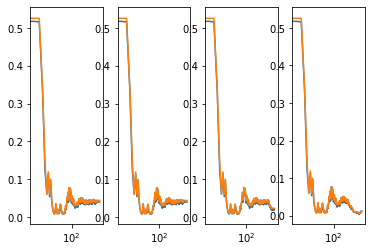

In [9]:
fig, axs = plt.subplots(1,4)
for index, (train_error, test_error) in enumerate(zip(train_errors, test_errors)):
    X = list(range(len(train_error)))
    axs[index].plot(X, train_error)
    axs[index].plot(X, test_error)
    axs[index].set_xscale("log")